## Imports

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

## Data Wrangling

In [2]:
# Load encoded data
training_data = pd.read_csv('CSV/AuburnInitialTraining.csv')
training_data.head()

,FacilityID,F120assetID,accountid,address,parcelnumb,yearstrucbuilt,yearwminstall,utilitymaterial,utilitymaterialbasis,utilstatus,...,ONEHOT_VotingDistrict_UNION_5,ONEHOT_VotingDistrict_UNION_6,ONEHOT_VotingDistrict_UNION_7,ONEHOT_VotingDistrict_UNION_8,ONEHOT_VotingDistrict_UNION_9,ONEHOT_CouncilDistrict_1,ONEHOT_CouncilDistrict_2,ONEHOT_CouncilDistrict_3,ONEHOT_CouncilDistrict_4,ONEHOT_CouncilDistrict_5
0,1000015,8256159.0,531520-004,1200 ALLISON BLVD,NaN,1982.0,NaN,Copper,Records,2,...,0,0,0,0,0,0,0,1,0,0
1,1000016,8256163.0,531600-003,1202 ALLISON BLVD,NaN,1982.0,NaN,Copper,Records,2,...,0,0,0,0,0,0,0,1,0,0
2,1000017,8256167.0,531445-003,1203 ALLISON BLVD,NaN,1982.0,NaN,Copper,Records,2,...,0,0,0,0,0,0,0,1,0,0
3,1000018,8256172.0,537740-004,1201 ALLISON BLVD,NaN,1982.0,NaN,Copper,Records,2,...,0,0,0,0,0,0,0,1,0,0
4,1000019,8256177.0,531620-003,1204 ALLISON BLVD,NaN,1982.0,NaN,Copper,Records,2,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# drop columns that are not needed like ones used for encoding
training_data = training_data.drop(columns=['F120assetID', 'accountid', 'address', 'parcelnumb', 'yearstrucbuilt', 'yearwminstall', 'utilitymaterial', 
                                            'utilitymaterialbasis', 'utilstatus', 'customermaterial', 'custmaterialbasis', 'custstatus', 'Latitude',
                                            'Longitude', 'Zoning', 'TaxDescription', 'HydrantMake', 'ZoneSummary', 'VotingDistrict', 'CouncilDistrict', 
                                            'DistToLead'])

training_data.head()

,FacilityID,LandValue,ImprovementValue,HydrantYear,MedianIncome,LeadPrediction,ONEHOT_TaxDescription_Agricultural,ONEHOT_TaxDescription_Commercial,ONEHOT_TaxDescription_Drain_Only,ONEHOT_TaxDescription_Exempt,...,ONEHOT_VotingDistrict_UNION_5,ONEHOT_VotingDistrict_UNION_6,ONEHOT_VotingDistrict_UNION_7,ONEHOT_VotingDistrict_UNION_8,ONEHOT_VotingDistrict_UNION_9,ONEHOT_CouncilDistrict_1,ONEHOT_CouncilDistrict_2,ONEHOT_CouncilDistrict_3,ONEHOT_CouncilDistrict_4,ONEHOT_CouncilDistrict_5
0,1000015,40000.0,154400.0,1978.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000016,37600.0,193900.0,1978.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000017,46000.0,182600.0,1977.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000018,38700.0,164300.0,1978.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000019,37600.0,210700.0,1977.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# print number of rows with any null values
print(training_data.isnull().sum())

FacilityID                                 0
LandValue                                  0
ImprovementValue                           0
HydrantYear                                1
MedianIncome                               0
LeadPrediction                             7
ONEHOT_TaxDescription_Agricultural         0
ONEHOT_TaxDescription_Commercial           0
ONEHOT_TaxDescription_Drain_Only           0
ONEHOT_TaxDescription_Exempt               0
ONEHOT_TaxDescription_Industrial           0
ONEHOT_TaxDescription_Residential          0
ONEHOT_TaxDescription_Utility              0
ONEHOT_HydrantMake_Clow_Corporation        0
ONEHOT_HydrantMake_Columbian_Iron_Works    0
ONEHOT_HydrantMake_Kennedy_Valve           0
ONEHOT_HydrantMake_Mueller_Company         0
ONEHOT_HydrantMake_Rensselaer_Valve        0
ONEHOT_HydrantMake_US_Pipe                 0
ONEHOT_HydrantMake_Waterous                0
ONEHOT_ZoneSummary_Agricultural            0
ONEHOT_ZoneSummary_Commercial              0
ONEHOT_Zon

In [5]:
# drop rows with any null values
training_data = training_data.dropna()

In [6]:
# print LeadPrediction values and number of rows with each value
print(training_data['LeadPrediction'].value_counts())

LeadPrediction
0.0    928
1.0     69
Name: count, dtype: int64


In [7]:
training_data.head()

,FacilityID,LandValue,ImprovementValue,HydrantYear,MedianIncome,LeadPrediction,ONEHOT_TaxDescription_Agricultural,ONEHOT_TaxDescription_Commercial,ONEHOT_TaxDescription_Drain_Only,ONEHOT_TaxDescription_Exempt,...,ONEHOT_VotingDistrict_UNION_5,ONEHOT_VotingDistrict_UNION_6,ONEHOT_VotingDistrict_UNION_7,ONEHOT_VotingDistrict_UNION_8,ONEHOT_VotingDistrict_UNION_9,ONEHOT_CouncilDistrict_1,ONEHOT_CouncilDistrict_2,ONEHOT_CouncilDistrict_3,ONEHOT_CouncilDistrict_4,ONEHOT_CouncilDistrict_5
0,1000015,40000.0,154400.0,1978.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000016,37600.0,193900.0,1978.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000017,46000.0,182600.0,1977.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000018,38700.0,164300.0,1978.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000019,37600.0,210700.0,1977.0,52963.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# save to csv
training_data.to_csv('CSV/AuburnInitialTrainingCleaned.csv', index=False)

## Create Model

### Prep Data

In [8]:
# split data into X and y
X = training_data.drop(columns=['FacilityID', 'LeadPrediction'])
y = training_data['LeadPrediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handle Class Imbalance

In [9]:
# Calculate scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Define parameters
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': scale_pos_weight
}

### Train Model

In [10]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

### Evaluate Model

In [11]:
# Make predictions
y_pred_proba = model.predict(dtest)  # Probabilities between 0 and 1
y_pred_binary = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary (0 or 1) using a threshold of 0.5

# Evaluate the model's performance
print(classification_report(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       186
         1.0       0.48      0.71      0.57        14

    accuracy                           0.93       200
   macro avg       0.73      0.83      0.77       200
weighted avg       0.94      0.93      0.93       200

[[175  11]
 [  4  10]]
AUC-ROC: 0.9519969278033795


In [12]:
# Calculate and print accuracy and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.925
ROC-AUC Score: 0.9519969278033795


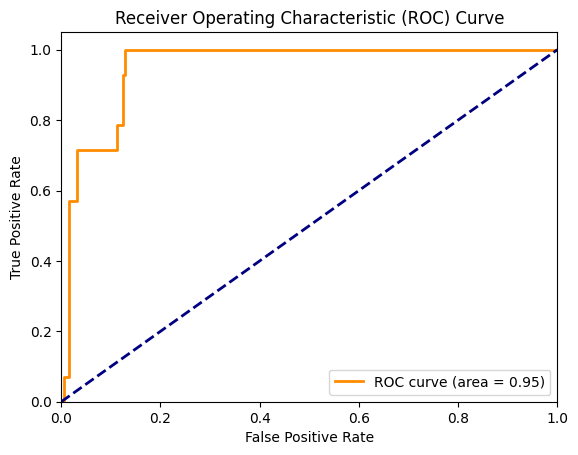

In [13]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

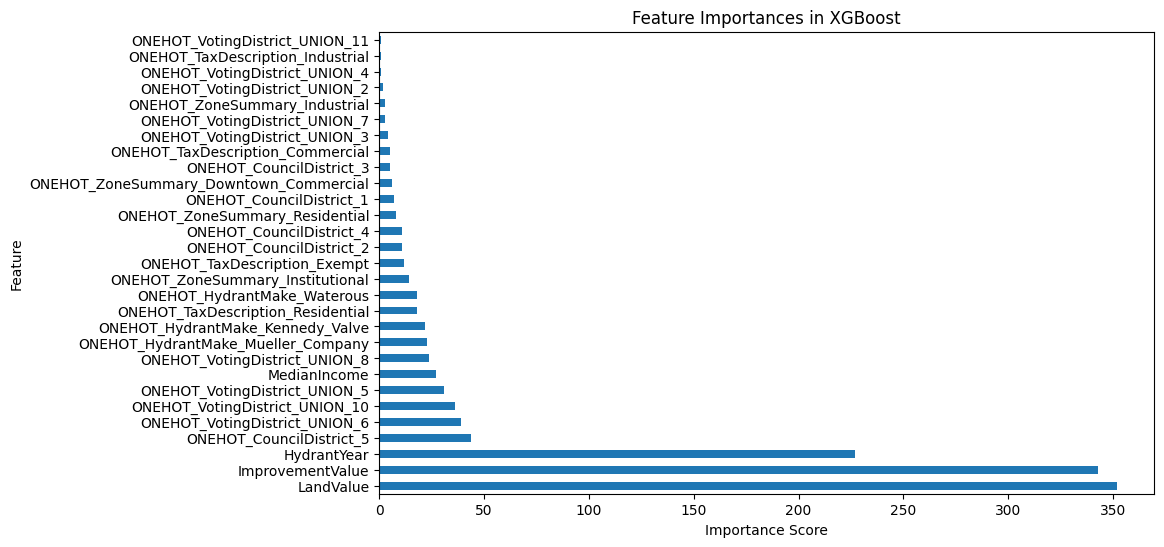

In [14]:
# Get feature importances from the model
feature_importance = model.get_score(importance_type='weight')

# Convert the feature importances to a pandas series
feature_importance_series = pd.Series(feature_importance).sort_values(ascending=False)

# Plot the non-zero features using a horizontal bar chart
plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='barh')
plt.title('Feature Importances in XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Predictions

### Prep Data

In [15]:
# Load encoded data
prediction_data = pd.read_csv('CSV/AuburnInitialInventory.csv')
prediction_data.head()

,FacilityID,F120assetID,accountid,address,parcelnumb,yearstrucbuilt,yearwminstall,utilitymaterial,utilitymaterialbasis,utilstatus,...,ONEHOT_VotingDistrict_UNION_5,ONEHOT_VotingDistrict_UNION_6,ONEHOT_VotingDistrict_UNION_7,ONEHOT_VotingDistrict_UNION_8,ONEHOT_VotingDistrict_UNION_9,ONEHOT_CouncilDistrict_1,ONEHOT_CouncilDistrict_2,ONEHOT_CouncilDistrict_3,ONEHOT_CouncilDistrict_4,ONEHOT_CouncilDistrict_5
0,1000001,8256066.0,528705-003,1102 ACE CT,NaN,1982.0,2015.0,Copper,Predictive Modeling,2.0,...,0,0,0,0,0,1,0,0,0,0
1,1000002,8256072.0,528740-001,1101 ACE CT,NaN,1982.0,2015.0,Copper,Predictive Modeling,2.0,...,0,0,0,0,0,1,0,0,0,0
2,1000003,8256078.0,528735-002,1104 ACE CT,NaN,1982.0,2015.0,Copper,Predictive Modeling,2.0,...,0,0,0,0,0,1,0,0,0,0
3,1000004,8256082.0,528710-002,1000 ALLISON BLVD,NaN,1982.0,NaN,Copper,Age,2.0,...,0,0,1,0,0,0,0,0,1,0
4,1000005,8256090.0,528710-002,1002 ALLISON BLVD,NaN,1982.0,NaN,Copper,Age,2.0,...,0,0,1,0,0,0,0,0,1,0


In [16]:
# drop columns that are not needed like ones used for encoding
prediction_data = prediction_data.drop(columns=['F120assetID', 'accountid', 'address', 'parcelnumb', 'yearstrucbuilt', 'yearwminstall', 'utilitymaterial', 
                                            'utilitymaterialbasis', 'utilstatus', 'customermaterial', 'custmaterialbasis', 'custstatus', 'Latitude',
                                            'Longitude', 'Zoning', 'TaxDescription', 'HydrantMake', 'ZoneSummary', 'VotingDistrict', 'CouncilDistrict', 
                                            'DistToLead', 'LeadPrediction'])

prediction_data.head()

,FacilityID,LandValue,ImprovementValue,HydrantYear,MedianIncome,ONEHOT_TaxDescription_Agricultural,ONEHOT_TaxDescription_Commercial,ONEHOT_TaxDescription_Drain_Only,ONEHOT_TaxDescription_Exempt,ONEHOT_TaxDescription_Industrial,...,ONEHOT_VotingDistrict_UNION_5,ONEHOT_VotingDistrict_UNION_6,ONEHOT_VotingDistrict_UNION_7,ONEHOT_VotingDistrict_UNION_8,ONEHOT_VotingDistrict_UNION_9,ONEHOT_CouncilDistrict_1,ONEHOT_CouncilDistrict_2,ONEHOT_CouncilDistrict_3,ONEHOT_CouncilDistrict_4,ONEHOT_CouncilDistrict_5
0,1000001,66400.0,472000.0,2015.0,52963.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1000002,84900.0,352300.0,2015.0,52963.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1000003,72700.0,378400.0,2015.0,52963.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1000004,46700.0,219900.0,1997.0,52963.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1000005,42000.0,178800.0,1973.0,52963.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
# print number of rows with any null values
print(prediction_data.isnull().sum())

FacilityID                                   0
LandValue                                    0
ImprovementValue                             0
HydrantYear                                222
MedianIncome                                 0
ONEHOT_TaxDescription_Agricultural           0
ONEHOT_TaxDescription_Commercial             0
ONEHOT_TaxDescription_Drain_Only             0
ONEHOT_TaxDescription_Exempt                 0
ONEHOT_TaxDescription_Industrial             0
ONEHOT_TaxDescription_Residential            0
ONEHOT_TaxDescription_Utility                0
ONEHOT_HydrantMake_Clow_Corporation         22
ONEHOT_HydrantMake_Columbian_Iron_Works     22
ONEHOT_HydrantMake_Kennedy_Valve            22
ONEHOT_HydrantMake_Mueller_Company          22
ONEHOT_HydrantMake_Rensselaer_Valve         22
ONEHOT_HydrantMake_US_Pipe                  22
ONEHOT_HydrantMake_Waterous                 22
ONEHOT_ZoneSummary_Agricultural              0
ONEHOT_ZoneSummary_Commercial                0
ONEHOT_ZoneSu

In [18]:
# if column begins with ONEHOT_, fill null values with 0
for column in prediction_data.columns:
    if column.startswith('ONEHOT_'):
        prediction_data[column] = prediction_data[column].fillna(0)

In [19]:
# drop rows with any null values
prediction_data = prediction_data.dropna()


In [20]:
prediction_data.head()

,FacilityID,LandValue,ImprovementValue,HydrantYear,MedianIncome,ONEHOT_TaxDescription_Agricultural,ONEHOT_TaxDescription_Commercial,ONEHOT_TaxDescription_Drain_Only,ONEHOT_TaxDescription_Exempt,ONEHOT_TaxDescription_Industrial,...,ONEHOT_VotingDistrict_UNION_5,ONEHOT_VotingDistrict_UNION_6,ONEHOT_VotingDistrict_UNION_7,ONEHOT_VotingDistrict_UNION_8,ONEHOT_VotingDistrict_UNION_9,ONEHOT_CouncilDistrict_1,ONEHOT_CouncilDistrict_2,ONEHOT_CouncilDistrict_3,ONEHOT_CouncilDistrict_4,ONEHOT_CouncilDistrict_5
0,1000001,66400.0,472000.0,2015.0,52963.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1000002,84900.0,352300.0,2015.0,52963.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1000003,72700.0,378400.0,2015.0,52963.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1000004,46700.0,219900.0,1997.0,52963.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1000005,42000.0,178800.0,1973.0,52963.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Predict

In [21]:
X_pred = prediction_data.drop(columns=['FacilityID'])

# Convert prediction data to DMatrix
dpred = xgb.DMatrix(X_pred)

# Make predictions (probabilities between 0 and 1)
predictions = model.predict(dpred)

# Add the predictions back to the DataFrame
prediction_data['LeadPrediction'] = predictions

prediction_data.head()

,FacilityID,LandValue,ImprovementValue,HydrantYear,MedianIncome,ONEHOT_TaxDescription_Agricultural,ONEHOT_TaxDescription_Commercial,ONEHOT_TaxDescription_Drain_Only,ONEHOT_TaxDescription_Exempt,ONEHOT_TaxDescription_Industrial,...,ONEHOT_VotingDistrict_UNION_6,ONEHOT_VotingDistrict_UNION_7,ONEHOT_VotingDistrict_UNION_8,ONEHOT_VotingDistrict_UNION_9,ONEHOT_CouncilDistrict_1,ONEHOT_CouncilDistrict_2,ONEHOT_CouncilDistrict_3,ONEHOT_CouncilDistrict_4,ONEHOT_CouncilDistrict_5,LeadPrediction
0,1000001,66400.0,472000.0,2015.0,52963.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.000641
1,1000002,84900.0,352300.0,2015.0,52963.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.000641
2,1000003,72700.0,378400.0,2015.0,52963.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.000641
3,1000004,46700.0,219900.0,1997.0,52963.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.002461
4,1000005,42000.0,178800.0,1973.0,52963.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.001049


In [22]:
# save to csv
prediction_data.to_csv('CSV/AuburnInitialInventoryPredictions.csv', index=False)